In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from read_lmp_dump import read_dump
from read_lmp_log import read_log
import re

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Task a)

# Task b)

# Task c)

# Task d)

# Task e)

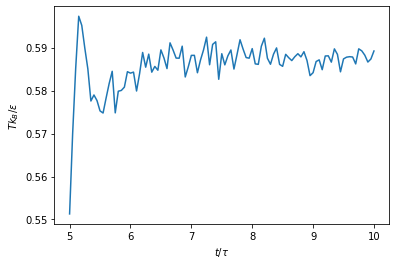

In [3]:
dataframe = read_log('./task_e/log.lammps')[0]
T = dataframe[['Temp']].to_numpy()
time = dataframe[['Time']].to_numpy()

plt.plot(time, T)
plt.xlabel(f'$t/\\tau$')
plt.ylabel(f'$Tk_B/\\epsilon$')
plt.show()

257818


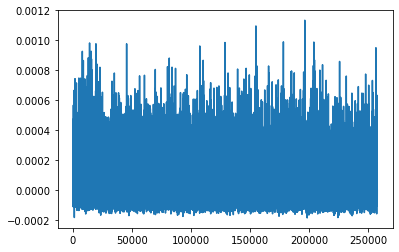

In [4]:
vol = read_log('./task_e/log.lammps')[0][['Volume']].to_numpy()[0]
dataframe = read_dump('./task_e/dump.task_e')
s1 = dataframe[['c_myStress1']].to_numpy()
s2 = dataframe[['c_myStress2']].to_numpy()
s3 = dataframe[['c_myStress3']].to_numpy()

p = -(s1 + s2 + s3) / (3 * vol)

print(len(p))

plt.plot(p)
plt.show()

# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.plot_surface(p)
# ax.set_xlabel(f'$Tk_B/\\epsilon$')
# ax.set_ylabel(f'$\\rho \\sigma^3$')
# ax.set_zlabel(f'$P\\sigma^3/\\epsilon$')
# plt.show()

# Task f)

In [20]:
def displacement(df, t_lin=0):
    msd = []
    t = []
    
    for i, dataframe in enumerate(df):
        new_df = dataframe[dataframe['Time'] > t_lin]
        
        t.append(new_df[['Time']].to_numpy()) # Same for each run
        msd.append(new_df[['c_myMSD[4]']].to_numpy()[:, 0])
    
    return msd, t


msd, t = displacement(read_log('./task_f/log.lammps'))

for i in range(len(msd)):
    plt.plot(t[i], msd[i])
plt.xlabel(f'$t / \\tau$')
plt.ylabel('Mean squared displacement')
plt.title('Porous Argon, T=1.5')
plt.tight_layout(True)
plt.show()

IndexError: list index out of range

In [18]:
tt = np.array(t[0][:, 0])
msdd = np.array(msd[0])

idx = np.argwhere(tt > 16)
tt = tt[idx][:, 0] * 2.1569
msdd = msdd[idx][:, 0] * 3.405
D, _ = np.polyfit(tt, msdd, 1)
print(f'Diffusion constant: {D / 6:.3f} Å^2/ps')

Diffusion constant: 0.510 $Å^2/ps$


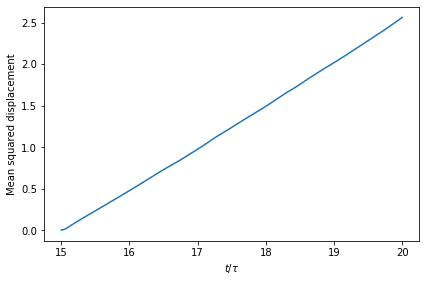

In [16]:
msd2, t2 = displacement(read_log('./task_f/log_msd.lammps'))

for i in range(len(msd2)):
    plt.plot(t2[i], msd2[i])
plt.xlabel(f'$t / \\tau$')
plt.ylabel('Mean squared displacement')
plt.title('Bulk Argon, T=1.5')
plt.tight_layout(True)
plt.show()

In [19]:
tt2 = np.array(t2[0][:, 0])
msdd2 = np.array(msd2[0])

idx = np.argwhere(tt2 > 16)
tt2 = tt2[idx][:, 0] * 2.1569
msdd2 = msdd2[idx][:, 0] * 3.405
D2, _ = np.polyfit(tt2, msdd2, 1)
print(f'Diffusion constant: {D2 / 6:.3f} Å^2/ps')

Diffusion constant: 0.137 Å^2/ps


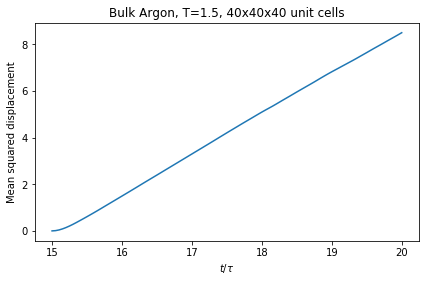

In [21]:
msd3, t3 = displacement(read_log('./task_f/log_40_system.lammps'))

for i in range(len(msd3)):
    plt.plot(t3[i], msd3[i])
plt.xlabel(f'$t / \\tau$')
plt.ylabel('Mean squared displacement')
plt.title('Bulk Argon, T=1.5, 40x40x40 unit cells')
plt.tight_layout(True)
plt.show()

In [22]:
tt3 = np.array(t3[0][:, 0])
msdd3 = np.array(msd3[0])

idx = np.argwhere(tt3 > 16)
tt3 = tt3[idx][:, 0] * 2.1569
msdd3 = msdd3[idx][:, 0] * 3.405
D3, _ = np.polyfit(tt3, msdd3, 1)
print(f'Diffusion constant: {D3 / 6:.3f} Å^2/ps')

Diffusion constant: 0.461 Å^2/ps


# Task h)

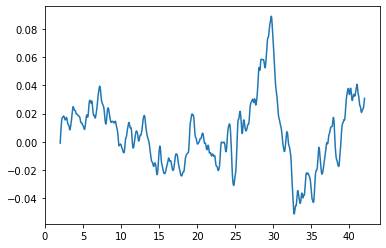

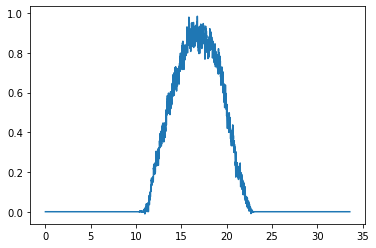

In [107]:
with open('task_h/no_particles_flow.txt', 'r') as f_open:
    no_atoms = int(f_open.read())

no_tsteps = 801

dataset = read_dump('./task_h/dump.task_h')

x = dataset[['x']].to_numpy()[:, 0]
y = dataset[['y']].to_numpy()[:, 0]
z = dataset[['z']].to_numpy()[:, 0]
vx = dataset[['vz']].to_numpy()[:, 0]

dataset2 = read_log('./task_h/log.lammps')[0]
time = dataset2[['Time']].to_numpy()[:, 0]

vx_arr = np.zeros((no_tsteps, no_atoms))
r_arr = np.zeros((no_tsteps, no_atoms))
z_arr = np.zeros((no_tsteps, no_atoms))
r = np.sqrt(x*x + y*y)

for i in range(no_tsteps):
    vx_arr[i, :] = vx[i * (no_atoms):(i + 1) * no_atoms]
    z_arr[i, :] = z[i * (no_atoms):(i + 1) * no_atoms]
    r_arr[i, :] = r[i * (no_atoms):(i + 1) * no_atoms]
    
plt.plot(time, np.average(vx_arr, axis=1))
plt.show()

def read_vel_profile(filename):
    with open(filename, 'r', newline='\n') as f_open:
        data = f_open.read()

    data = re.sub(' +', ' ', data)

    lines = data.split('\n')
    lines = lines[4:-1]

    vel_arr = np.zeros((len(lines)))
    coord_arr = np.zeros(len(lines))
    Ncount_arr = np.zeros(len(lines))

    for i, line in enumerate(lines):
        temp = np.fromstring(line, dtype=float, sep=' ')
        vel_arr[i] = temp[3]
        coord_arr[i] = temp[1]
        Ncount_arr[i] = temp[2]

    
    return vel_arr, coord_arr, Ncount_arr

v, coord, N = read_vel_profile('./task_h/tmp.profile_nvtnvenve_t1.05')

plt.plot(coord, v)
plt.show()

The above figure is for the whole domain. Focusing on the pore we get

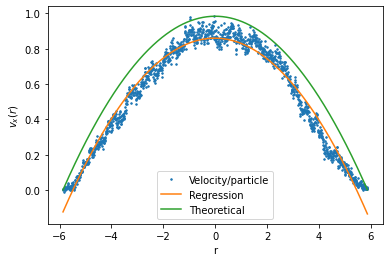

In [108]:
b = 5.72
sigma = 3.405

F = 0.1

L = 20 * b / sigma
R = 20 / sigma

v_pore = v[(coord >= L/2 - R) & (coord <= L/2 + R)]
r = coord[(coord >= L/2 - R) & (coord <= L/2 + R)] - L/2

u_th = np.max(v_pore) * (1 - (r / R)**2)

a, b, c = np.polyfit(r, v_pore, 2)

plt.plot(r, v_pore, 'o', label='Velocity/particle', markersize=1.5)
plt.plot(r, a * r**2 + b * r + c, label='Regression')
plt.plot(r, u_th, label='Theoretical')
plt.xlabel('r')
plt.ylabel('$v_x(r)$')
plt.legend()
plt.show()

The velocity profile is given by

\begin{equation}
u(r) = \frac{G}{4\mu}\left(a^2 - r^2\right),
\end{equation}

where we insert $G = nF_x$, where $n = N/V$ is the number density. To find $\mu$ we perform a first order polynomial fit 

In [109]:
nF = F * no_atoms / (np.pi * R * R * L)

mu = nF / (4 * np.polyfit((R * R - r * r), v_pore, 1)[0])

mu_th = nF * R * R / (4 * np.max(v_pore)) # From the theoretical model

print(mu, mu_th)

0.38407841407144006 0.38659238688673137


# Task i)

In [ ]:
import os

porosities = []

for pores in [10, 15, 20, 25, 30]:
    folder = os.path.join('task_i', 'simulations', str(pores))
    with open(os.path.join(folder, porosity.txt)) as infile:
        porosities.append(infile.read())

k = []
K = 5

for perm in porosities:
    